In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage


1. Подберите параметры алгоритма разрастания регионов так, чтобы был выделен весь участок газона.

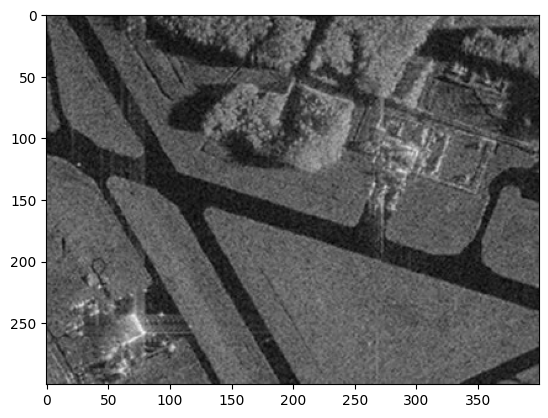

In [2]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap="gray")

In [3]:
def homo_average(img, mask, point, T):
    av_val = img[mask > 0].sum() / np.count_nonzero(img[mask > 0])
    if abs(av_val - img[point]) <= T:
        return True
    return False

(np.float64(-0.5), np.float64(399.5), np.float64(299.5), np.float64(-0.5))

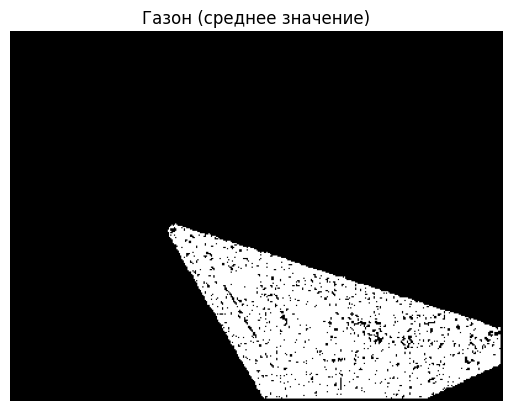

In [4]:
def region_growing(image, seed_point, homo_fun, r, T):
    mask = np.zeros(image_gray.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image_gray.shape, np.uint8)
        for i in range(r, image.shape[0] - r):
            for j in range(r, image.shape[1] - r):
                if mask[i,j] == 0 and mask[i - r:i + r, j - r: j + r].sum() > 0:
                    if homo_fun(image, mask, (i,j), T):
                        local_mask[i,j] = 1
        count = np.count_nonzero(local_mask)
        mask += local_mask
    return mask * 255

seed_point = (250, 250)
mask_lawn_avg = region_growing(image_gray, seed_point, homo_average, 2, 15)

plt.imshow(mask_lawn_avg, cmap="gray")
plt.title("Газон (среднее значение)")
plt.axis('off')

2. Реализуйте вычисление критерия однородности, отличного от представленного. Сравните результаты.

In [5]:
def homo_median(img, mask, point, T):
    if np.count_nonzero(mask) > 0:
        median_val = np.median(img[mask > 0])
        if abs(median_val - img[point]) <= T:
            return True
    return False

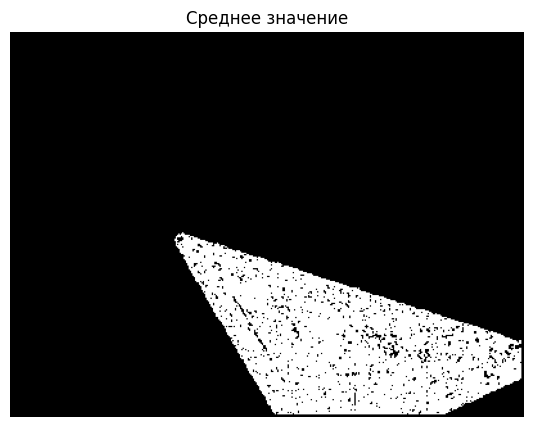

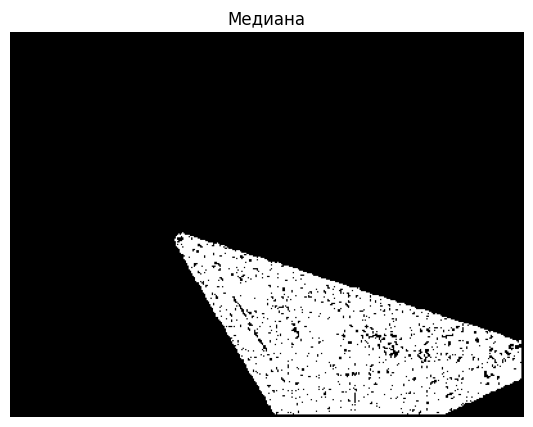

In [6]:
mask_lawn_median = region_growing(image_gray, seed_point, homo_median, 2, 15)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(mask_lawn_avg, cmap="gray")
plt.title("Среднее значение")
plt.axis('off')


plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
plt.imshow(mask_lawn_median, cmap="gray")
plt.title("Медиана")
plt.axis('off')
plt.show()


3. Применить алгоритм сегментации watershed+distance transform для задачи подсчета пальмовых деревьев.

In [13]:
image = cv2.imread('palm_1.jpg')
image_gray = cv2.imread('palm_1.jpg', cv2.IMREAD_GRAYSCALE)

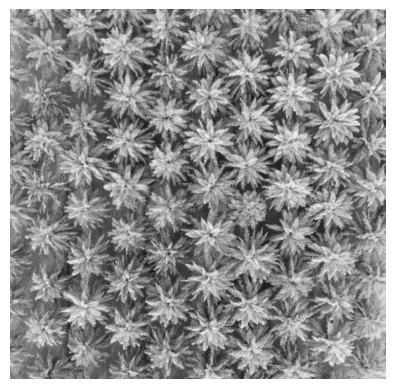

In [14]:
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.show()

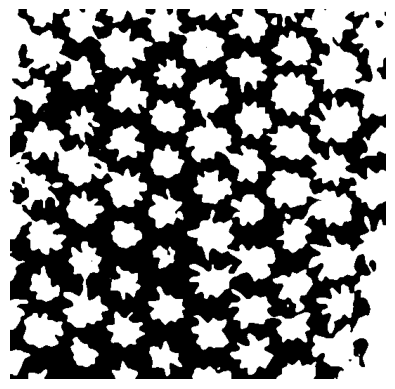

In [15]:
blurr = cv2.GaussianBlur(image_gray, (19, 19), 0)
ret, thresh = cv2.threshold(blurr,0,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

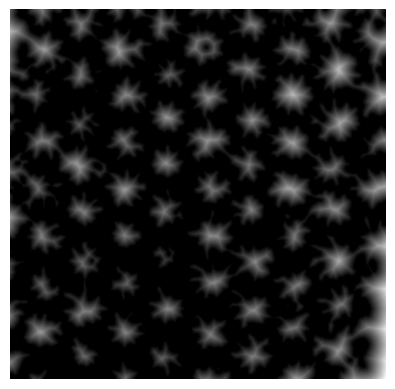

In [16]:
dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
plt.imshow(dist, cmap='gray')
plt.axis('off')
plt.show()

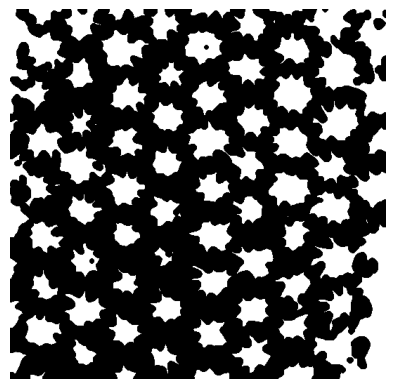

In [17]:
ret, sure_fg = cv2.threshold(dist, 0.1 * dist.max(), 255, cv2.THRESH_BINARY)
plt.imshow(sure_fg, cmap='gray')
plt.axis('off')
plt.show()

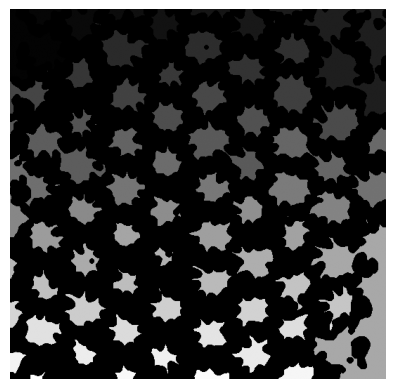

In [18]:
sure_fg = sure_fg.astype(np.uint8)
ret, markers = cv2.connectedComponents(sure_fg)
plt.imshow(markers, cmap='gray')
plt.axis('off')
plt.show()

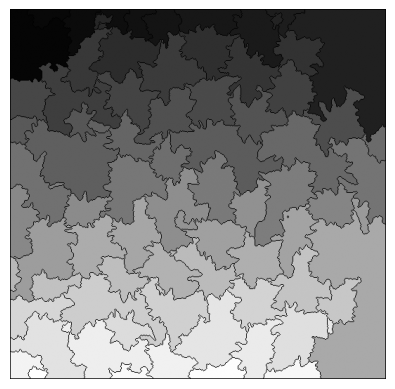

In [19]:
markers = cv2.watershed(image, markers)
plt.imshow(markers, cmap='gray')
plt.axis('off')
plt.show()

In [20]:
result = len(np.unique(markers)) - 1
print(f'Количество пальм: {result}')

Количество пальм: 84
